## import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
bm_data = pd.read_excel('bm.xlsx')
bm_data.head()

,Keyword ID,Keyword Category,Country,Device,Cost,Clicks,Revenue,RPC,CPC,ROAS,Total Clickouts,Tracked Clickouts,Tracking Coverage,Booking Value
0,12136471,A,US,desktop,5714.33,1172,2013.58,NaN,4.875708,0.352374,926,515,0.556156,9748
1,91730045,A,Spain,phone,4691.94,17306,9912.34,NaN,0.271116,2.112631,13989,10587,0.756809,8313
2,119124300,A,US,phone,4671.65,2700,3924.61,NaN,1.730241,0.840091,1717,554,0.322656,4901
3,101751504,A,US,phone,2771.68,1947,2789.86,NaN,1.423564,1.006559,1247,432,0.346431,1778
4,12136471,A,US,phone,2743.42,1507,1999.14,NaN,1.820451,0.728704,869,441,0.507480,5658


In [3]:
bm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 14 columns):
Keyword ID           478 non-null int64
Keyword Category     478 non-null object
Country              478 non-null object
Device               478 non-null object
Cost                 478 non-null float64
Clicks               478 non-null int64
Revenue              478 non-null float64
RPC                  0 non-null float64
CPC                  478 non-null float64
ROAS                 478 non-null float64
Total Clickouts      478 non-null int64
Tracked Clickouts    478 non-null int64
Tracking Coverage    478 non-null float64
Booking Value        478 non-null int64
dtypes: float64(6), int64(5), object(3)
memory usage: 52.4+ KB


In [4]:
bm_data.describe()

,Keyword ID,Cost,Clicks,Revenue,RPC,CPC,ROAS,Total Clickouts,Tracked Clickouts,Tracking Coverage,Booking Value
count,4.780000e+02,478.000000,478.000000,478.000000,0.0,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,4.396471e+10,409.357552,432.062762,373.196025,NaN,1.583785,0.944025,303.778243,177.163180,0.520281,807.102510
std,1.080848e+11,510.001194,940.962438,584.998029,NaN,1.114576,0.588439,722.754712,531.318926,0.149161,1161.066144
min,1.000333e+07,161.150000,32.000000,33.880000,NaN,0.157548,0.164187,16.000000,3.000000,0.052632,0.000000
25%,9.520143e+07,192.580000,126.000000,132.397500,NaN,0.728995,0.517123,90.000000,41.250000,0.414789,0.000000
50%,2.538256e+08,254.925000,248.000000,234.190000,NaN,1.310063,0.776681,167.500000,76.000000,0.533124,388.500000
75%,1.183312e+10,402.797500,472.250000,430.400000,NaN,2.090618,1.170279,309.250000,169.750000,0.631627,1077.250000
max,5.216341e+11,5714.330000,17306.000000,9912.340000,NaN,5.852424,4.101981,13989.000000,10587.000000,0.942308,9748.000000


In [5]:
bm_data['RPC'] = bm_data['Revenue']/bm_data['Clicks']
bm_data.sort_index(by='RPC', ascending=False).head()

,Keyword ID,Keyword Category,Country,Device,Cost,Clicks,Revenue,RPC,CPC,ROAS,Total Clickouts,Tracked Clickouts,Tracking Coverage,Booking Value
293,297709444307,A,US,desktop,225.86,61,214.28,3.512787,3.702623,0.948729,70,39,0.557143,881
247,294306019,A,US,desktop,250.44,81,278.49,3.438148,3.091852,1.112003,97,58,0.597938,962
325,296475442491,A,US,desktop,212.37,76,227.75,2.996711,2.794342,1.072421,89,55,0.617978,1603
233,3398507837,A,US,desktop,258.95,48,125.32,2.610833,5.394792,0.483954,49,22,0.448980,1370
472,14360282,A,US,desktop,161.76,32,82.74,2.585625,5.055000,0.511499,21,13,0.619048,1498


**a) Answer**: `297709444307`, `294306019` and `296475442491` are the top performing keywords

## b) 1.

In [6]:
Overall_ROAS = bm_data['ROAS'].sum()
print(Overall_ROAS)

451.2437626342651


**Answer:** No. Our target is `478.00`. We're falling short.

## b) 2.

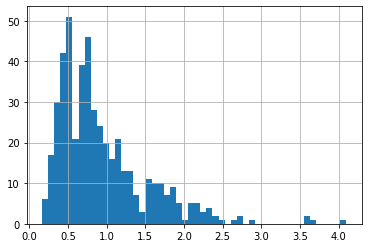

In [12]:
%matplotlib inline
bm_data['ROAS'].hist(bins=50)

In [25]:
bm_data.groupby(['Country']).mean()

,Keyword ID,Cost,Clicks,Revenue,RPC,CPC,ROAS,Total Clickouts,Tracked Clickouts,Tracking Coverage,Booking Value
Country,,,,,,,,,,,
France,1.931437e+10,360.956981,456.886792,309.606792,0.762229,1.032184,0.911454,311.735849,188.301887,0.582606,906.283019
Germany,7.471583e+09,382.570714,428.258929,358.719911,1.030834,1.367061,1.009222,324.767857,196.196429,0.585031,687.678571
Spain,3.063327e+10,409.025932,1041.254237,523.539831,0.554271,0.734642,1.062830,845.728814,577.372881,0.645553,1173.474576
US,6.829642e+10,431.345433,287.055118,357.925433,1.321388,1.991688,0.894476,166.976378,73.484252,0.449627,753.964567


In [24]:
bm_data.groupby(['Country', 'Device']).mean()

Keyword ID        Cost       Clicks     Revenue       RPC  \
Country Device                                                                 
France  desktop  2.346378e+10  329.345600   283.400000  188.572800  0.799846   
        phone    1.560954e+10  389.181429   611.785714  417.672857  0.728642   
Germany desktop  8.724152e+09  379.803684   208.315789  233.643509  1.167257   
        phone    6.173466e+09  385.438364   656.200000  488.344545  0.889450   
Spain   desktop  4.299606e+09  300.564000   199.933333  155.832000  0.764815   
        phone    3.961066e+10  446.001591  1328.068182  648.894773  0.482494   
US      desktop  5.895060e+10  439.066146   149.281250  209.807500  1.480885   
        phone    7.397489e+10  426.654367   370.765823  447.921139  1.224479   

                      CPC      ROAS  Total Clickouts  Tracked Clickouts  \
Country Device                                                            
France  desktop  1.391120  0.591600       200.840000         110.000000   
        phone    0.711705  1.197037       410.750000         258.214286   
Germany desktop  1.952395  0.619971       207.789474         119.052632   
        phone    0.760442  1.412627       446.000000         276.145455   
Spain   desktop  1.550346  0.522543       273.800000         167.600000   
        phone    0.456562  1.247019      1040.704545         717.068182   
US      desktop  3.090912  0.505573        97.770833          45.885417   
        phone    1.323805  1.130772       209.025316          90.253165   

                 Tracking Coverage  Booking Value  
Country Device                                     
France  desktop           0.547204     863.000000  
        phone             0.614215     944.928571  
Germany desktop           0.569490     911.754386  
        phone             0.601138     455.454545  
Spain   desktop           0.613654    1283.600000  
        phone             0.656428    1135.931818  
US      desktop           0.464057     922.500000  
        phone             0.440859     651.563291

**Answer:** It is evident that US market, particularly in desktop devices is doing poorly. We may focus on generating either more revenue in this region on this device, by adding more tariffs or better SEO. This will raise the revenues and hence the overall ROAS to a more achievable 100%.

## b) 3.

## c) 1.

**Answer:** I understand the scenario as follows: 
`Total Click-outs`: Number of clicks on the booking website like `trivago.com` when I search say `Budapest` with dates.
`Tracked Click-outs`: Number of clicks tracked to hotel website. E.g. from `trivago.com` to `hotelbudapest.com`.

The coverage is below 100% because I as a user may not go on to book hotel. I'm simply checking out the cost and availability of a tour package, which is often the case.

I may also be using it to compare prices with a rival website.

So for above two reasons, the `Tracked click-outs` won't be matching the `Total click-outs` thereby reducing the coverage.

## c) 2.

**Answer:** It varies on keyword because the keyword determines where the user wants to stay. Keywords correspond to locations. E.g. if a user has a certain budget in mind for spending on accommodation, he may choose different locations. A stay in Manhattan will likely be more expensive than a stay in New Jersey. Therefore a certain user may choose to go with a cheaper option, thereby increasing coverage of some cheaper locations, ergo keywords than of of the more expensive ones. This also sheds some light on the user behaviour. We can correlate spending patterns with locations.

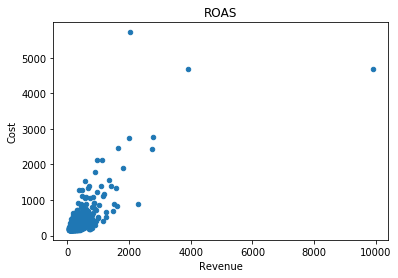

In [26]:
bm_data.plot.scatter(x='Revenue', y='Cost', title='ROAS')